# Telecom Churn Case Study

### Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

The goal is to reduce customer churn and for that telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

### Step 1: Reading and Understanding the data:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


In [6]:
df.shape

(69999, 172)

### Step 2: Data Cleaning:

### Let's check null values percentage present in various columns:

In [7]:
for col in df.columns:
    null_col = df[col].isnull().sum() / df.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

id : 0.00
circle_id : 0.00
loc_og_t2o_mou : 1.00
std_og_t2o_mou : 1.00
loc_ic_t2o_mou : 1.00
last_date_of_month_6 : 0.00
last_date_of_month_7 : 0.57
last_date_of_month_8 : 1.05
arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.95
onnet_mou_7 : 3.84
onnet_mou_8 : 5.29
offnet_mou_6 : 3.95
offnet_mou_7 : 3.84
offnet_mou_8 : 5.29
roam_ic_mou_6 : 3.95
roam_ic_mou_7 : 3.84
roam_ic_mou_8 : 5.29
roam_og_mou_6 : 3.95
roam_og_mou_7 : 3.84
roam_og_mou_8 : 5.29
loc_og_t2t_mou_6 : 3.95
loc_og_t2t_mou_7 : 3.84
loc_og_t2t_mou_8 : 5.29
loc_og_t2m_mou_6 : 3.95
loc_og_t2m_mou_7 : 3.84
loc_og_t2m_mou_8 : 5.29
loc_og_t2f_mou_6 : 3.95
loc_og_t2f_mou_7 : 3.84
loc_og_t2f_mou_8 : 5.29
loc_og_t2c_mou_6 : 3.95
loc_og_t2c_mou_7 : 3.84
loc_og_t2c_mou_8 : 5.29
loc_og_mou_6 : 3.95
loc_og_mou_7 : 3.84
loc_og_mou_8 : 5.29
std_og_t2t_mou_6 : 3.95
std_og_t2t_mou_7 : 3.84
std_og_t2t_mou_8 : 5.29
std_og_t2m_mou_6 : 3.95
std_og_t2m_mou_7 : 3.84
std_og_t2m_mou_8 : 5.29
std_og_t2f_mou_6 : 3.95
std_og_t2f_mou_7 : 3.8

In [8]:
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

15.241795813029887

This is the complete percentage of null values present in the training data.

### Impute recharge columns with 0 for blanks as the customer hasn't recharged in those months

In [9]:
rech = ['total_rech_num_6',
	 'total_rech_num_7',
	 'total_rech_num_8' ,
	 'total_rech_amt_6',
	 'total_rech_amt_7' ,
	 'total_rech_amt_8' ,
	  'max_rech_amt_6',   
	 'max_rech_amt_7',   
	 'max_rech_amt_8',   
	 'total_rech_data_6',
	 'total_rech_data_7',     
	 'total_rech_data_8',    
	 'max_rech_data_6',   
	 'max_rech_data_7',  
	 'max_rech_data_8', 
	 'count_rech_2g_6' ,
	 'count_rech_2g_7' ,
	  'count_rech_2g_8',
	  'count_rech_3g_6',
	 'count_rech_3g_7',
	 'count_rech_3g_8',
	 'av_rech_amt_data_6',
	 'av_rech_amt_data_7', 
	 'av_rech_amt_data_8']

df[rech] = df[rech].apply(lambda x: x.fillna(0))

### Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [10]:
cat_cols = ['night_pck_user_6',
'night_pck_user_7', 
'night_pck_user_8',
'fb_user_6',
'fb_user_7',
'fb_user_8' ]

In [11]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

Now, let's check for the date columns in our dataset.

In [12]:
colls = []
for col in df.columns:
    if df[col].dtype == object:
        colls+=[col]
        print(col)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [13]:
df[colls]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


The date columns are not adding any extra information as all the other columns are already divided into three months Jun, Jul and Aug. Since the date columns are not useful in predicting the churn of customers, we are going to drop them.

In [14]:
df = df.drop(colls,axis=1)

Below are the columns having the percentage of null values > 50%

In [15]:
coll=[]
for col in df.columns:
    null_col = df[col].isnull().sum() / df.shape[0] * 100
    if null_col > 50:    
        coll+=[col]
print(coll)

['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


Since high percentage of null values will affect our analysis, we are dropping these columns.

In [16]:
df = df.drop(coll,axis=1)

Since the Id columns are not useful, we will drop them also.

In [17]:
df = df.drop(['id','circle_id'],axis =1)

Now, we are checking how much null values in percentage we are left with.

In [18]:
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

2.4672057527089097

In [19]:
churn_cols = df.columns

# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer 
imp = IterativeImputer(max_iter=1)
churn_imputed = imp.fit_transform(df)

In [20]:
# convert imputed numpy array to pandas dataframe
df = pd.DataFrame(churn_imputed, columns=churn_cols)
print(df.isnull().sum()*100/df.shape[0])

loc_og_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_ic_t2o_mou       0.0
arpu_6               0.0
arpu_7               0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 155, dtype: float64


We are cross checking to see if there are any more null values in our dataset.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 155 entries, loc_og_t2o_mou to churn_probability
dtypes: float64(155)
memory usage: 82.8 MB


Now, there are 155 colums left.

### First we need to filter out the High Value Customers, as we will be performing our analysis on them.

Let's derive the values of total data rechatge done in the months June and July  by the customers.

In [22]:
df['total_data_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

We can drop the columns total_rech_data and av_rech_amt_data for these months.

In [23]:
df = df.drop(columns = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_rech_data_6', 'total_rech_data_7'], axis =1)

Let's find the averages of data and recharge of the customers for the two months.

In [24]:
df['total_rech_6'] = df['total_data_6'] + df['total_rech_amt_6']
df['total_rech_7'] = df['total_data_7'] + df['total_rech_amt_7']

df['avg_rech_6_7'] = (df['total_rech_6'] + df['total_rech_7'])/2

In [25]:
df['avg_rech_6_7'].value_counts()

0.00       2202
55.00      1049
110.00      775
100.00      730
60.00       724
           ... 
1509.00       1
2432.00       1
2044.50       1
1701.25       1
3515.00       1
Name: avg_rech_6_7, Length: 5453, dtype: int64

In [26]:
print("Recharge amount at 70th percentile :{0}".format(df['avg_rech_6_7'].quantile(0.7)))

Recharge amount at 70th percentile :477.5


In [27]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_filtered = df.loc[df.avg_rech_6_7 >= df.avg_rech_6_7.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.shape

(21013, 156)

### Checking data imbalance:

We are checking how many unique values are present in each of the columns.

In [28]:
colls = []
for col in df_filtered.columns:
    if df_filtered[col].nunique() ==1:
        colls+=[col]
    print('{} : {}'.format(col,df[col].nunique()))

loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
arpu_6 : 61615
arpu_7 : 61425
arpu_8 : 60194
onnet_mou_6 : 22825
onnet_mou_7 : 22763
onnet_mou_8 : 23428
offnet_mou_6 : 29022
offnet_mou_7 : 28826
offnet_mou_8 : 29698
roam_ic_mou_6 : 8074
roam_ic_mou_7 : 6927
roam_ic_mou_8 : 7955
roam_og_mou_6 : 9336
roam_og_mou_7 : 7992
roam_og_mou_8 : 8918
loc_og_t2t_mou_6 : 14259
loc_og_t2t_mou_7 : 14046
loc_og_t2t_mou_8 : 14999
loc_og_t2m_mou_6 : 20616
loc_og_t2m_mou_7 : 20328
loc_og_t2m_mou_8 : 21319
loc_og_t2f_mou_6 : 6144
loc_og_t2f_mou_7 : 6052
loc_og_t2f_mou_8 : 7014
loc_og_t2c_mou_6 : 4713
loc_og_t2c_mou_7 : 4790
loc_og_t2c_mou_8 : 5907
loc_og_mou_6 : 25077
loc_og_mou_7 : 24699
loc_og_mou_8 : 25653
std_og_t2t_mou_6 : 17322
std_og_t2t_mou_7 : 17432
std_og_t2t_mou_8 : 18186
std_og_t2m_mou_6 : 18827
std_og_t2m_mou_7 : 18921
std_og_t2m_mou_8 : 19671
std_og_t2f_mou_6 : 4842
std_og_t2f_mou_7 : 4678
std_og_t2f_mou_8 : 5648
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std_og_t2c_mou_8 : 1
std_og_

Here we have observed that there are 9 columns which have a single value. We are filtering them and storing in 'colls' list.

In [29]:
df_filtered[colls]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need to drop the columns having a single value as it does not add any useful information to our analysis.

In [30]:
df_filtered = df_filtered.drop(colls,axis=1)

### Checking the Churn Ratio:

In [31]:
# print churn ratio
print("Churn Ratio:")
print(df_filtered.churn_probability.value_counts()*100/df_filtered.shape[0])

Churn Ratio:
0.0    91.724171
1.0     8.275829
Name: churn_probability, dtype: float64


We can see there is a huge impalance in the ratio of Non-Churn and Churn in our dataset. It will lead to a biased and faulty analysis. We will take care of this problem by assigning class_weights at the time of model building.

### Checking Duplicate Rows:

Let's check if there are any duplicate rows present in our dataset.

In [32]:
df_filtered.duplicated().sum()

0

We can see there are no duplicate rows.

### Step 3: Data Visualisation and EDA:

Let's set a criteria that the columns having unique values < 20 will be considered categorical columns. The rest are to be considered as numeric columns.

### Univariate EDA:

In [33]:
def category_counts(cols):
    plt.figure(figsize=(10,8));
    sns.countplot(x=df_filtered[cols],palette='RdYlGn');
    plt.xlabel(cols);
    plt.ylabel('Counts');
    plt.title(f"{cols} Value Counts");
    plt.show()

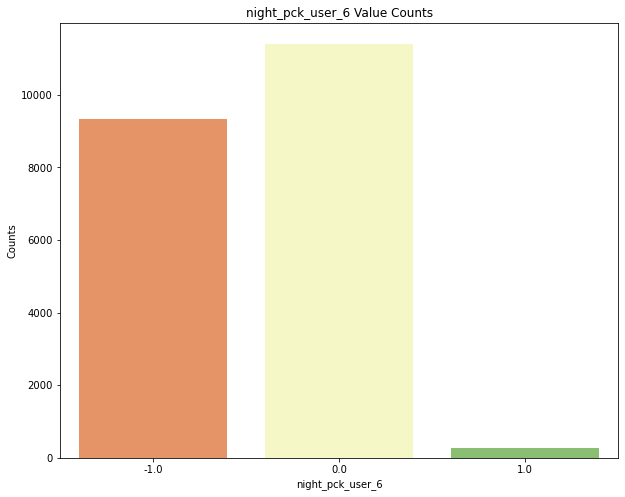

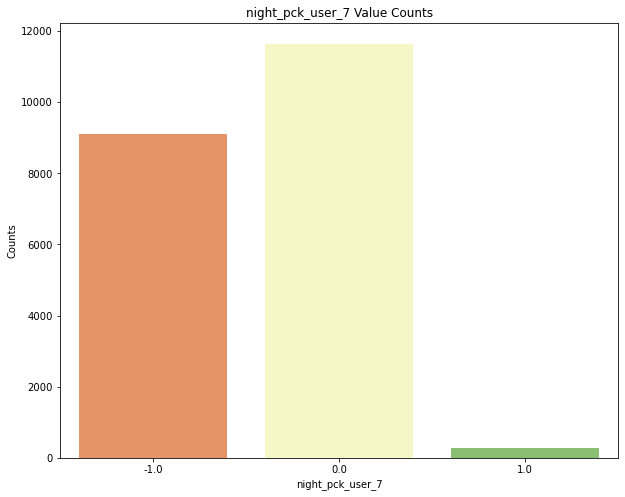

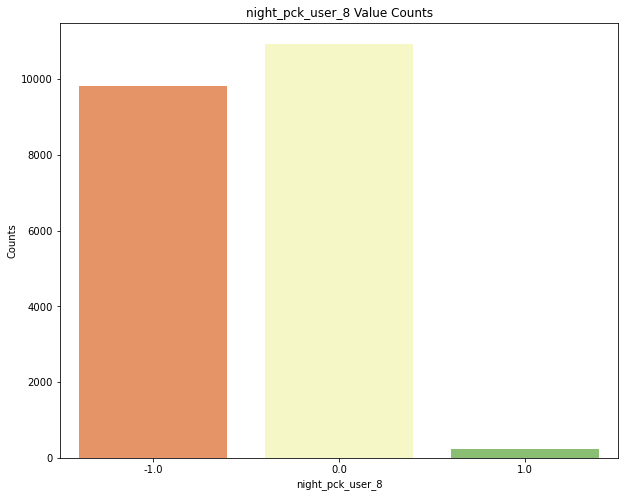

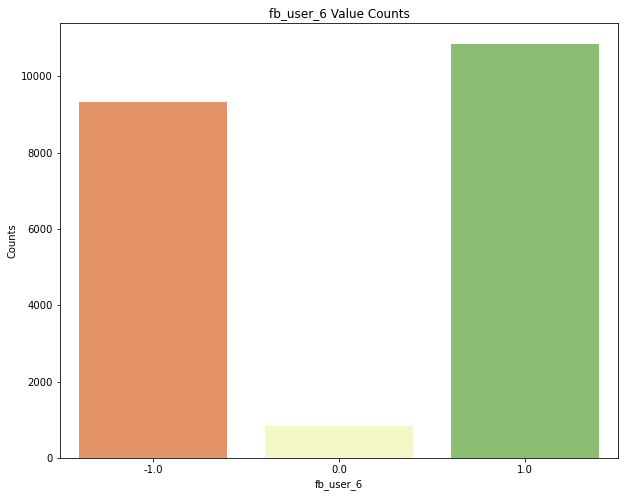

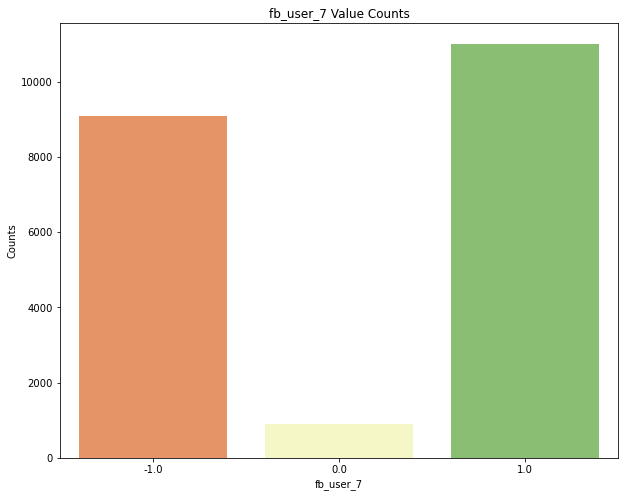

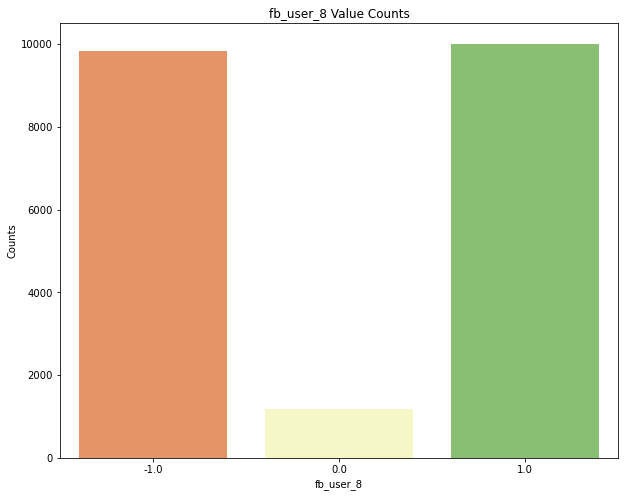

In [34]:
for col in cat_cols:
    category_counts(col)

**Observations:**
1. Night pack users in all the three months are highest for the non-churn customers.
2. The churn customers are the highest fb users for all three months.

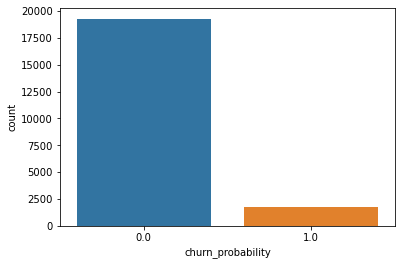

In [35]:
sns.countplot(df_filtered.churn_probability)
plt.show()

count    21013.000000
mean       558.458938
std        474.147345
min      -2258.709000
25%        307.718000
50%        482.616000
75%        700.552000
max      27731.088000
Name: arpu_6, dtype: float64


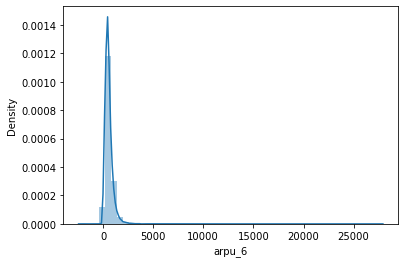

In [36]:
sns.distplot(df_filtered.arpu_6)
print(df_filtered.arpu_6.describe())
plt.show()

count    21013.000000
mean        66.726605
std        163.095602
min          0.000000
25%          7.860000
50%         27.460000
75%         68.210000
max       5709.590000
Name: loc_ic_t2t_mou_7, dtype: float64


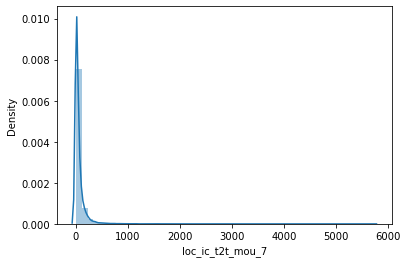

In [37]:
sns.distplot(df_filtered.loc_ic_t2t_mou_7)
print(df_filtered.loc_ic_t2t_mou_7.describe())
plt.show()

count    21013.000000
mean       168.949269
std        177.213399
min          0.000000
25%        110.000000
50%        120.000000
75%        200.000000
max       4010.000000
Name: max_rech_amt_6, dtype: float64


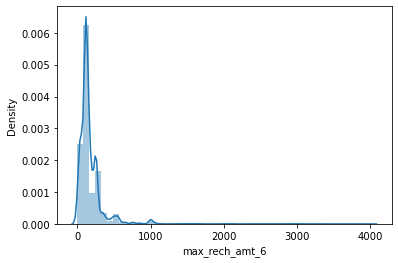

In [38]:
sns.distplot(df_filtered.max_rech_amt_6)
print(df_filtered.max_rech_amt_6.describe())
plt.show()

count    21013.000000
mean       232.524111
std        465.700958
min       -750.457455
25%         10.290000
50%         65.340000
75%        238.040000
max      10752.560000
Name: onnet_mou_8, dtype: float64


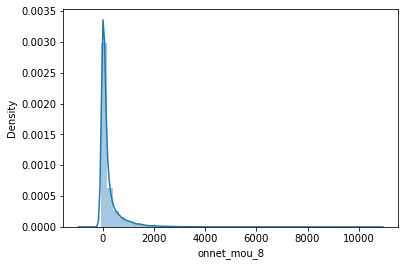

In [39]:
sns.distplot(df_filtered.onnet_mou_8)
print(df_filtered.onnet_mou_8.describe())
plt.show()

count    21013.000000
mean       342.103599
std        473.301695
min          0.000000
25%         63.310000
50%        183.760000
75%        436.840000
max      14007.340000
Name: offnet_mou_8, dtype: float64


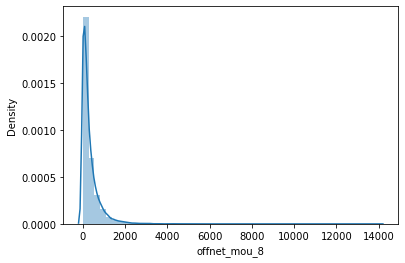

In [40]:
sns.distplot(df_filtered.offnet_mou_8)
print(df_filtered.offnet_mou_8.describe())
plt.show()

**Observations:**
We can see all the numeric variables are heavily left-skewed.

### Bivariate EDA with segmentation:

In [41]:
df_filtered['churn_probability'] = df_filtered['churn_probability'].astype('category')

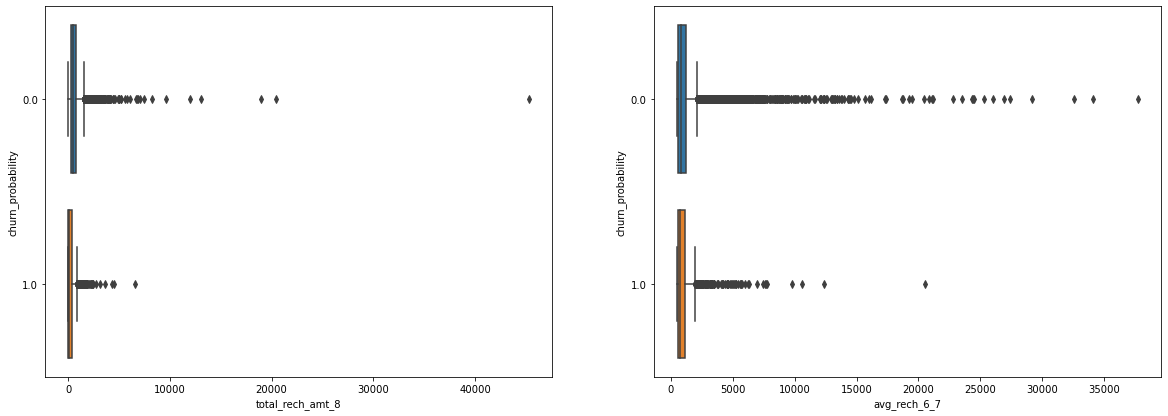

In [42]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.boxplot(data =df_filtered,y='churn_probability', x='total_rech_amt_8')
plt.subplot(222)
sns.boxplot(data =df_filtered,y='churn_probability', x='avg_rech_6_7')
plt.show()

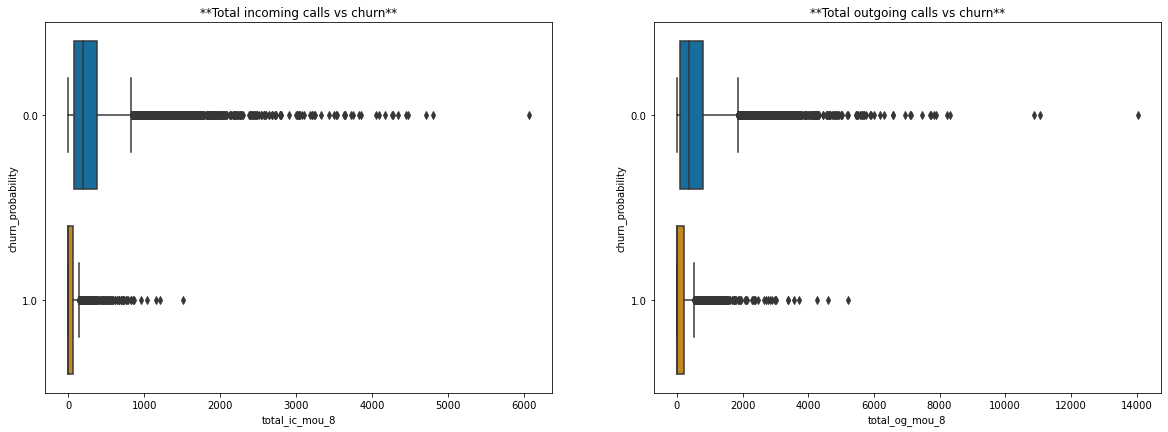

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.boxplot(data =df_filtered, x='total_ic_mou_8',y='churn_probability',palette="colorblind")
plt.title('**Total incoming calls vs churn**')
plt.subplot(222)
sns.boxplot(data =df_filtered, x='total_og_mou_8',y='churn_probability',palette="colorblind")
plt.title('**Total outgoing calls vs churn**')
plt.show()

**Observations:**
The distribution of total outgoing and incoming calls in month 8 is more widely spread for Non-churn customers rather than churn customers.

In [44]:
pd.crosstab(df_filtered.churn_probability, df_filtered.count_rech_3g_8)

count_rech_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,23.0,24.0,25.0,29.0,30.0,42.0,45.0
churn_probability,,,,,,,,,,,,,,,,,,,,,
0.0,14764,2886,898,322,135,80,48,33,24,16,...,1,3,1,2,1,1,1,1,1,1
1.0,1607,92,20,10,5,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pd.crosstab(df_filtered.churn_probability, df_filtered.sachet_3g_7)

sachet_3g_7,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,31.0,33.0
churn_probability,,,,,,,,,,,,,,,,,,,,,
0.0,17162,1334,351,142,74,65,46,22,12,9,...,1,1,3,1,3,1,3,1,1,1
1.0,1591,90,24,10,5,6,3,3,1,2,...,0,1,0,0,0,0,0,1,0,0


### Step 4: Data Preparation:

### Cap outliers in all numeric variables with k-sigma technique

In [46]:
num_cols = [column for column in df_filtered.columns if column not in cat_cols]

In [47]:
num_cols.remove('churn_probability')
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [48]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array
df_filtered[num_cols] = df_filtered[num_cols].apply(cap_outliers, axis=0)

In [49]:
df_filtered['churn_probability'] = pd.to_numeric(df_filtered['churn_probability'])
df_filtered['churn_probability']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21008    0.0
21009    0.0
21010    0.0
21011    0.0
21012    0.0
Name: churn_probability, Length: 21013, dtype: float64

In [50]:
X = df_filtered.drop(['churn_probability'],axis=1)
y=df_filtered['churn_probability']

### Aggregating Categorical columns:

In [51]:
train = pd.concat([X, y], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())

night_pck_user_6
-1.0    0.099925
 0.0    0.068104
 1.0    0.108303
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.117000
 0.0    0.056505
 1.0    0.062044
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.142276
 0.0    0.030439
 1.0    0.029167
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.099925
 0.0    0.080432
 1.0    0.068184
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.117000
 0.0    0.070099
 1.0    0.055515
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.142276
 0.0    0.076923
 1.0    0.024975
Name: churn_probability, dtype: float64


In [52]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1.0:    0.099925,
 0.0:    0.068104,
 1.0:    0.108303},
           'night_pck_user_7' : {-1.0:    0.117000,
 0.0:    0.056505,
 1.0:    0.062044},
           'night_pck_user_8' : {-1.0:    0.142276,
 0.0:    0.030439,
 1.0:    0.029167},
           'fb_user_6'        : {-1.0:    0.099925,
 0.0:    0.080432,
 1.0:    0.068184},
           'fb_user_7'        : {-1.0:    0.117000,
 0.0:    0.070099,
 1.0:    0.055515},
           'fb_user_8'        : {-1.0:    0.142276,
 0.0:    0.076923,
 1.0:    0.024975}
          }

X.replace(mapping, inplace = True)

In [53]:
# check data type of categorical columns - make sure they are numeric
X[[col for col in cat_cols]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  21013 non-null  float64
 1   night_pck_user_7  21013 non-null  float64
 2   night_pck_user_8  21013 non-null  float64
 3   fb_user_6         21013 non-null  float64
 4   fb_user_7         21013 non-null  float64
 5   fb_user_8         21013 non-null  float64
dtypes: float64(6)
memory usage: 985.1 KB


### Test Data Preparation:

Let's now prepare our test dataset for analysis

In [54]:
df = pd.read_csv('test (1).csv')

In [55]:
sol = pd.read_csv('solution (1).csv')
df_test = df.merge(sol,on='id')

In [56]:
df_test

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00,0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84,1
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00,0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,718.870,396.259,...,0,0,1.0,NaN,NaN,1255,3.71,105.64,61.48,0
29996,99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,218.327,324.070,...,0,0,NaN,0.0,NaN,2258,0.00,0.00,0.00,0
29997,99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,139.473,38.230,...,0,0,NaN,NaN,NaN,440,0.00,0.00,0.00,0
29998,99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1122.912,781.121,...,0,0,NaN,NaN,NaN,810,0.00,0.00,0.00,0


In [57]:
df_test[rech] = df_test[rech].apply(lambda x: x.fillna(0))

In [58]:
# replace missing values with '-1' in categorical columns
df_test[cat_cols] = df_test[cat_cols].apply(lambda x: x.fillna(-1))

In [59]:
colls = []
for col in df_test.columns:
    if df_test[col].dtype == object:
        colls+=[col]
        print(col)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [60]:
df_test = df_test.drop(colls,axis=1)

In [61]:
coll=[]
for col in df_test.columns:
    null_col = df_test[col].isnull().sum() / df_test.shape[0] * 100
    if null_col > 50:    
        coll+=[col]
print(coll)

['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


Since high percentage of null values will affect our analysis, we are dropping these columns.

In [62]:
df_test = df_test.drop(coll,axis=1)

Since the Id columns are not useful, we will drop them also.

In [63]:
df_test = df_test.drop(['id','circle_id'],axis =1)

Let's derive the values of total data rechatge done in the months June, July and August by the customers.

In [64]:
df_test['total_data_6'] = df_test.total_rech_data_6 * df_test.av_rech_amt_data_6
df_test['total_data_7'] = df_test.total_rech_data_7 * df_test.av_rech_amt_data_7

We can drop the columns total_rech_data and av_rech_amt_data for all the three months.

In [65]:
df_test = df_test.drop(columns = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_rech_data_6', 'total_rech_data_7'], axis =1)

Let's find the averages of data and recharge of the customers for the three months.

In [66]:
df_test['total_rech_6'] = df_test['total_data_6'] + df_test['total_rech_amt_6']
df_test['total_rech_7'] = df_test['total_data_7'] + df_test['total_rech_amt_7']

df_test['avg_rech_6_7'] = (df_test['total_rech_6'] + df_test['total_rech_7'])/2

We are checking how many unique values are present in each of the columns.

In [67]:
colls = []
for col in df_test.columns:
    if df_test[col].nunique() ==1:
        colls+=[col]

We need to drop the columns having a single value as it does not add any useful information to our analysis.

In [68]:
df_test = df_test.drop(colls,axis=1)

Imputing the missing values in test dataset.

In [69]:
df_test_cols = df_test.columns

# using MICE technique to impute missing values in the rest of the columns
df_test = imp.fit_transform(df_test)

In [70]:
# convert imputed numpy array to pandas dataframe
df_test = pd.DataFrame(df_test, columns=df_test_cols)
print(df_test.isnull().sum()*100/df_test.shape[0])

arpu_6          0.0
arpu_7          0.0
arpu_8          0.0
onnet_mou_6     0.0
onnet_mou_7     0.0
               ... 
total_data_6    0.0
total_data_7    0.0
total_rech_6    0.0
total_rech_7    0.0
avg_rech_6_7    0.0
Length: 147, dtype: float64


In [71]:
df_test[num_cols] = df_test[num_cols].apply(cap_outliers, axis=0)

In [72]:
# aggregate the categorical variables
print(df_test.groupby('night_pck_user_6').churn_probability.mean())
print(df_test.groupby('night_pck_user_7').churn_probability.mean())
print(df_test.groupby('night_pck_user_8').churn_probability.mean())
print(df_test.groupby('fb_user_6').churn_probability.mean())
print(df_test.groupby('fb_user_7').churn_probability.mean())
print(df_test.groupby('fb_user_8').churn_probability.mean())

night_pck_user_6
-1.0    0.108008
 0.0    0.084077
 1.0    0.085561
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.115995
 0.0    0.061481
 1.0    0.056604
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.126280
 0.0    0.034407
 1.0    0.024691
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.108008
 0.0    0.115666
 1.0    0.080991
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.115995
 0.0    0.076709
 1.0    0.059808
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.126280
 0.0    0.054907
 1.0    0.031701
Name: churn_probability, dtype: float64


In [73]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1.0:    0.108008, 0.0:    0.084077, 1.0:    0.085561},
           'night_pck_user_7' : {-1.0:    0.115995, 0.0:    0.061481, 1.0:    0.056604},
           'night_pck_user_8' : {-1.0:    0.126280, 0.0:    0.034407, 1.0:    0.024691},
           'fb_user_6'        : {-1.0:    0.108008, 0.0:    0.115666, 1.0:    0.080991},
           'fb_user_7'        : {-1.0:    0.115995, 0.0:    0.076709, 1.0:    0.059808},
           'fb_user_8'        : {-1.0:    0.126280, 0.0:    0.054907, 1.0:    0.031701}
          }

In [74]:
X_test = df_test.drop('churn_probability',axis=1)
y_test = df_test['churn_probability']

In [75]:
X_test.replace(mapping, inplace = True)

### Step 5: Model Building

Import required libraries

In [76]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Let's define two functions 'confusion_matrix_plot' and 'cal_score' which will help us in visualising the results each time we run a model.

In [77]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(12,10))
    cmap = "YlOrRd_r"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 25,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [78]:
def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(predictions, labels)
    print(matrix)
    print('\n')

    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

### PCA

In [79]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X)
churn_pca = pca.fit_transform(X)
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
with pd.option_context('display.max_rows', None,):
    print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.95
1       23.52
2       30.17
3       35.84
4       40.00
5       43.08
6       46.13
7       48.75
8       51.32
9       53.66
10      55.97
11      57.90
12      59.77
13      61.48
14      63.06
15      64.53
16      65.98
17      67.41
18      68.81
19      70.10
20      71.22
21      72.30
22      73.33
23      74.26
24      75.17
25      76.06
26      76.94
27      77.77
28      78.57
29      79.33
30      80.05
31      80.75
32      81.42
33      82.04
34      82.64
35      83.23
36      83.79
37      84.34
38      84.88
39      85.41
40      85.92
41      86.41
42      86.89
43      87.35
44      87.79
45      88.21
46      88.63
47      89.02
48      89.41
49      89.79
50      90.16
51      90.52
52      90.88
53      91.22
54      91.54
55      91.86
56      92.16
57      92.46
58      92.74
59      93.00
60      93.25
61      93.50
62      93.75
63      94.00
64      94.23
65      94.45
66      94.67
67      94.89
68      95.10
69      95.31
70      95.50
71    

~ 50 components explain 90% variance

~ 68 components explain 95% variance

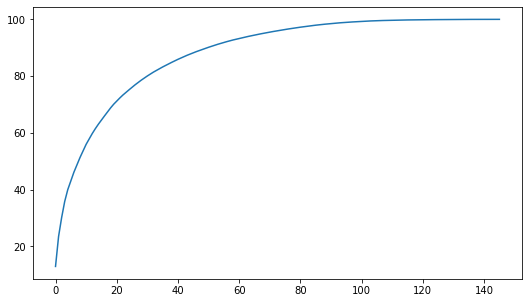

In [80]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [81]:
# create pipeline
PCA_VARS = 50
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [82]:
# fit model
pipeline.fit(X, y)

# check score on train data
print('Train accuracy')
print(pipeline.score(X, y))

Train accuracy
0.846380811878361


[[23200   582]
 [ 3741  2477]]


F1 Score: 0.8358527989788517


              precision    recall  f1-score   support

       False       0.86      0.98      0.91     23782
        True       0.81      0.40      0.53      6218

    accuracy                           0.86     30000
   macro avg       0.84      0.69      0.72     30000
weighted avg       0.85      0.86      0.84     30000



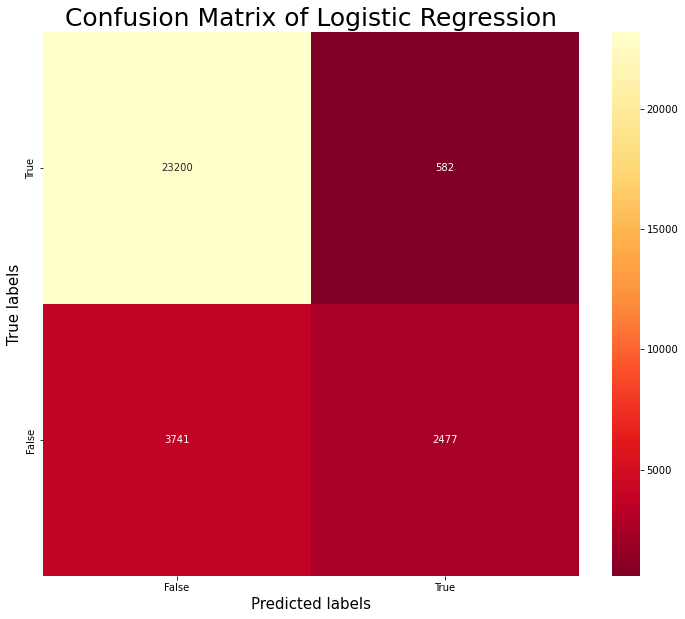

In [83]:
# create onfusion matrix
cal_score(x_test=X_test,y_test=y_test,model=pipeline,name='Logistic Regression')


In [84]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.81
Specificity: 	0.86
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [85]:
# class imbalance
y.value_counts()/y.shape

0.0    0.917242
1.0    0.082758
Name: churn_probability, dtype: float64

In [86]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [50, 68], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [87]:
# fit model
model.fit(X, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [50, 68]},
             scoring='roc_auc', verbose=1)

In [88]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.443617,0.130353,0.000000,0.000000,0.1,l1,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,3.253237,0.223364,0.000000,0.000000,0.1,l1,68,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
2,2.597150,0.302223,0.102225,0.017471,0.1,l2,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.909588,0.897007,0.890910,0.902656,0.893263,0.898685,0.006742,9
3,3.815090,0.421480,0.121231,0.023133,0.1,l2,68,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.910589,0.899179,0.890531,0.904738,0.894630,0.899934,0.007124,5
4,2.356684,0.132595,0.000000,0.000000,0.5,l1,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
5,3.323238,0.475977,0.000000,0.000000,0.5,l1,68,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,2.930907,0.309421,0.128430,0.045107,0.5,l2,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.909149,0.897117,0.889795,0.903533,0.893548,0.898628,0.006941,10
7,3.702519,0.057462,0.111023,0.016772,0.5,l2,68,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.910798,0.898772,0.890298,0.905207,0.894930,0.900001,0.007281,3
8,2.219195,0.300595,0.000000,0.000000,1,l1,50,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
9,3.322602,0.397252,0.000000,0.000000,1,l1,68,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [89]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9005591667979452
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 68}


In [90]:
print('Train accuracy')
print(model.score(X, y))

Train accuracy
0.9068163704163253


[[23981   666]
 [ 2960  2393]]


F1 Score: 0.865340153045504


              precision    recall  f1-score   support

       False       0.89      0.97      0.93     24647
        True       0.78      0.45      0.57      5353

    accuracy                           0.88     30000
   macro avg       0.84      0.71      0.75     30000
weighted avg       0.87      0.88      0.87     30000



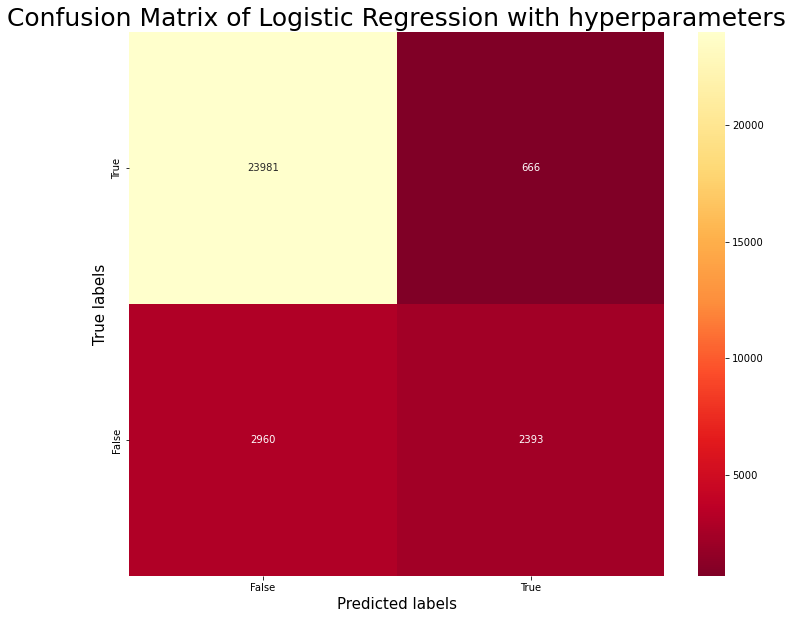

In [91]:
# create onfusion matrix
cal_score(x_test=X_test,y_test=y_test,model=model,name='Logistic Regression with hyperparameters')


In [92]:
# predict churn on test data
y_pred = model.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.78
Specificity: 	0.89
AUC:    	 0.9


### Random Forest

In [93]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf_model.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

In [ ]:
# create onfusion matrix
cal_score(x_test=X_test,y_test=y_test,model=rf_model,name='Random Forest')


In [ ]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Choosing best features

In [ ]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [ ]:
# fit model
rf_model.fit(X, y)

In [ ]:
# OOB score
rf_model.oob_score_

In [ ]:
# create onfusion matrix
cal_score(x_test=X_test,y_test=y_test,model=rf_model,name='Random Forest')


In [ ]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Feature Importance

In [ ]:
# predictors
features = df_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
with pd.option_context('display.max_rows', None,):
    print(feature_importance)

### Extracting top 20 features

In [ ]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]

In [ ]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X[top_features].corr(), center=0.0, cmap=mycmap)

In [ ]:
top_features = ['roam_og_mou_8', 'loc_og_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'total_ic_mou_8', 
                'arpu_8', 'onnet_mou_8', 'loc_ic_t2m_mou_8']
X_train = X[top_features]
X_test_1 = X_test[top_features]

In [ ]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# create onfusion matrix
cal_score(x_test=X_test_1,y_test=y_test,model=model,name='Logistic Regression')


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test_1)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Extract the intercept and the coefficients from the logistic model 

In [ ]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [ ]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [ ]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [ ]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

### Creating a XGBoost Model:

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1, colsample_bytree=1,min_child_weight=1,
                           objective="binary:logistic",eval_metric=['error','auc'] )
xgb_clf.fit(X, y)

#### Train Result

In [ ]:
print("Classification Report: \n {}\n".format(classification_report(y, xgb_clf.predict(X))))

#### Test Result

In [ ]:
# create onfusion matrix
cal_score(x_test=X_test,y_test=y_test,model=xgb_clf,name='XGBoost')


In [ ]:
# predict churn on test data
y_pred = xgb_clf.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Feature Importance

In [ ]:
# predictors
features = df_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = xgb_clf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
with pd.option_context('display.max_rows', None,):
    print(feature_importance)

### Extracting top 20 features

In [ ]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]

In [ ]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X[top_features].corr(), center=0.0, cmap=mycmap)

In [ ]:
top_features = [
 'total_ic_mou_8',             
'std_og_mou_7',
'av_rech_amt_data_8',
'isd_ic_mou_8',
'roam_og_mou_8',
'loc_ic_mou_8',
'last_day_rch_amt_8',
'spl_ic_mou_8',
'roam_og_mou_7',
'total_rech_amt_8' ]
X_train = X[top_features]
X_test_1 = X_test[top_features]

In [ ]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# create onfusion matrix
cal_score(x_test=X_test_1,y_test=y_test,model=model,name='Logistic Regression')


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test_1)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Extract the intercept and the coefficients from the logistic model 

In [ ]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [ ]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [ ]:
# coefficients
coefficients = logistic_model.coef_.reshape(10, 1).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [ ]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

### Conclusion:

The most important features according to XGBoost is providing us the best accuracy of 0.94 and f1-score of 0.939. The top 10 important features according to XGBoost are:

- total_ic_mou_8             
- std_og_mou_7
- av_rech_amt_data_8
- isd_ic_mou_8
- roam_og_mou_8
- loc_ic_mou_8
- last_day_rch_amt_8
- spl_ic_mou_8
- roam_og_mou_7
- total_rech_amt_8

## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 

#### Submission:

In [ ]:
k = pd.read_csv('test (1).csv')

In [ ]:
probabilities = xgb_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame({'id':k.id,'churn_probability':probabilities})

In [ ]:
submission.to_csv('Submission.csv',index=False)